# New family of exact solutions for colliding plane gravitational waves by Yurtsever
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 31, 2021

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.37.2790

https://thesis.library.caltech.edu/8009/

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols( 't rho phi z dt drho dphi dz', positive = True, real = True ) 

In [4]:
psi = Function('psi')(rho,z)
psi

In [5]:
gamma = Function('gamma')(rho,z)
gamma

In [6]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( - exp(2*psi)*dt**2 + exp(-2*psi)*rho**2 *dphi**2 + exp(2*(gamma-psi)) * (drho**2 + dz**2) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅ψ(ρ, z)                                                                ⎤
⎢-ℯ                     0                   0                   0           ⎥
⎢                                                                           ⎥
⎢              2⋅γ(ρ, z)  -2⋅ψ(ρ, z)                                        ⎥
⎢     0       ℯ         ⋅ℯ                  0                   0           ⎥
⎢                                                                           ⎥
⎢                                      2  -2⋅ψ(ρ, z)                        ⎥
⎢     0                 0             ρ ⋅ℯ                      0           ⎥
⎢                                                                           ⎥
⎢                                                      2⋅γ(ρ, z)  -2⋅ψ(ρ, z)⎥
⎣     0                 0                   0         ℯ         ⋅ℯ          ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅ψ(ρ, z)                                                                ⎤
⎢-ℯ                     0                   0                   0           ⎥
⎢                                                                           ⎥
⎢              2⋅γ(ρ, z)  -2⋅ψ(ρ, z)                                        ⎥
⎢     0       ℯ         ⋅ℯ                  0                   0           ⎥
⎢                                                                           ⎥
⎢                                      2  -2⋅ψ(ρ, z)                        ⎥
⎢     0                 0             ρ ⋅ℯ                      0           ⎥
⎢                                                                           ⎥
⎢                                                      2⋅γ(ρ, z)  -2⋅ψ(ρ, z)⎥
⎣     0                 0                   0         ℯ         ⋅ℯ          ⎦

In [12]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t rho phi z" , positive = True, real = True)
t,rho,phi,z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                            ⎡ -2⋅γ(ρ, z)  4⋅ψ(ρ, z) ∂                      
⎢                                            ⎢ℯ          ⋅ℯ         ⋅──(ψ(ρ, z))            
⎢                                            ⎢                       ∂ρ                     
⎢                                            ⎢                                              
⎢⎡             ∂               ∂          ⎤  ⎢                                    ⎛   2⋅γ(ρ,
⎢⎢     0       ──(ψ(ρ, z))  0  ──(ψ(ρ, z))⎥  ⎢                                    ⎜2⋅ℯ      
⎢⎢             ∂ρ              ∂z         ⎥  ⎢                                    ⎝         
⎢⎢                                        ⎥  ⎢                0                   ──────────
⎢⎢∂                                       ⎥  ⎢                                              
⎢⎢──(ψ(ρ, z))       0       0       0     ⎥  ⎢                                              
⎢⎢∂ρ                                      ⎥  ⎢                        

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                            
⎢⎜   ∂                ∂             ∂          ⎟  -2⋅γ(ρ, z) + 4⋅ψ(ρ, z)                    
⎢⎜ρ⋅───(ψ(ρ, z)) + ρ⋅───(ψ(ρ, z)) + ──(ψ(ρ, z))⎟⋅ℯ                                          
⎢⎜    2                2            ∂ρ         ⎟                                            
⎢⎝  ∂ρ               ∂z                        ⎠                                            
⎢───────────────────────────────────────────────────────────────────────                    
⎢                                   ρ                                                       
⎢                                                                                           
⎢                                                                           ⎛    2          
⎢                                                                           ⎜   ∂           
⎢                                                                     

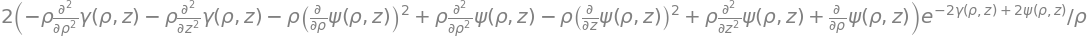

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞                               ⎛      2     
⎢⎜   ∂                ∂             ∂          ⎟  -2⋅γ(ρ, z) + 4⋅ψ(ρ, z)       ⎜     ∂      
⎢⎜ρ⋅───(ψ(ρ, z)) + ρ⋅───(ψ(ρ, z)) + ──(ψ(ρ, z))⎟⋅ℯ                         1.0⋅⎜- ρ⋅───(γ(ρ,
⎢⎜    2                2            ∂ρ         ⎟                               ⎜      2     
⎢⎝  ∂ρ               ∂z                        ⎠                               ⎝    ∂ρ      
⎢─────────────────────────────────────────────────────────────────────── + ─────────────────
⎢                                   ρ                                                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [26]:
simplifiedRicci = simplify(Ric.tensor())
simplifiedRicci

⎡⎛    2                2                       ⎞                                            
⎢⎜   ∂                ∂             ∂          ⎟  -2⋅γ(ρ, z) + 4⋅ψ(ρ, z)                    
⎢⎜ρ⋅───(ψ(ρ, z)) + ρ⋅───(ψ(ρ, z)) + ──(ψ(ρ, z))⎟⋅ℯ                                          
⎢⎜    2                2            ∂ρ         ⎟                                            
⎢⎝  ∂ρ               ∂z                        ⎠                                            
⎢───────────────────────────────────────────────────────────────────────                    
⎢                                   ρ                                                       
⎢                                                                                           
⎢                                                                             ⎛  2          
⎢                                                                             ⎜ ∂           
⎢                                                                     

In [25]:
simplifiedEinstein = simplify(einst.tensor())
simplifiedEinstein

⎡⎛      2                2                           2           2                          
⎢⎜     ∂                ∂               ⎛∂          ⎞           ∂               ⎛∂          
⎢⎜- ρ⋅───(γ(ρ, z)) - ρ⋅───(γ(ρ, z)) - ρ⋅⎜──(ψ(ρ, z))⎟  + 2.0⋅ρ⋅───(ψ(ρ, z)) - ρ⋅⎜──(ψ(ρ, z))
⎢⎜      2                2              ⎝∂ρ         ⎠            2              ⎝∂z         
⎢⎝    ∂ρ               ∂z                                      ∂ρ                           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                              ρ            
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

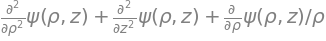

In [35]:
equation3pt2a = expand((1/rho)*simplifiedRicci[0,0].args[1])
equation3pt2a

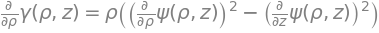

In [36]:
equation3pt2b = Eq( diff(gamma,rho) , solve( simplifiedEinstein[1,1] , diff(gamma,rho) )[0] ) 
equation3pt2b

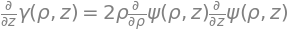

In [37]:
equation3pt2c = Eq(diff(gamma,z),solve( simplifiedRicci[3,1] , diff(gamma,z) )[0] ) 
equation3pt2c

In [39]:
vacuumFieldEquations = Matrix([equation3pt2a,equation3pt2b,equation3pt2c])
vacuumFieldEquations

⎡                                  ∂              ⎤
⎢      2              2            ──(ψ(ρ, z))    ⎥
⎢     ∂              ∂             ∂ρ             ⎥
⎢    ───(ψ(ρ, z)) + ───(ψ(ρ, z)) + ───────────    ⎥
⎢      2              2                 ρ         ⎥
⎢    ∂ρ             ∂z                            ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(ρ, z)) = ρ⋅⎜⎜──(ψ(ρ, z))⎟  - ⎜──(ψ(ρ, z))⎟ ⎟⎥
⎢∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(ρ, z)) = 2⋅ρ⋅──(ψ(ρ, z))⋅──(ψ(ρ, z))    ⎥
⎣    ∂z                ∂ρ          ∂z             ⎦